In [69]:
import numpy as np
from matplotlib import pyplot as plt

from anki import Collection

In [70]:
col = Collection('/home/eahn/.local/share/Anki2/Eric/collection.anki2')

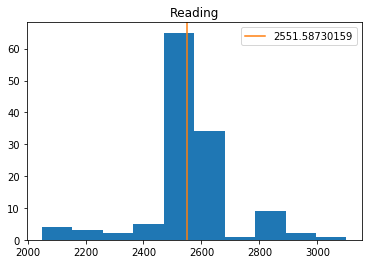

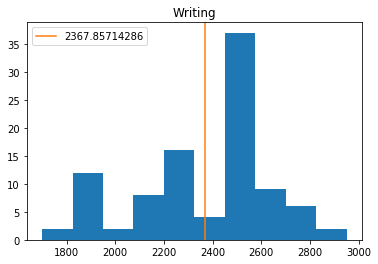

In [71]:
for card_type in ('Reading', 'Writing'):
    # Get all cards of requird type
    cids = col.findCards('deck:Mandarin::Heisig card:{} is:review'.format(card_type))
    cards = [col.getCard(cid) for cid in cids]
    
    # Get mature cards
    ivls = [card.ivl for card in cards]
    cards = [card for card in cards if card.ivl > np.percentile(ivls, 90)]
    
    # Get positive factors
    factors = [card.factor for card in cards]
    factors = [f for f in factors if f > 0]
    
    mean_factor = np.mean(factors)
    plt.hist(factors, 10)
    plt.axvline(mean_factor, color='C1', label=mean_factor)
    plt.title(card_type)
    plt.legend()
    plt.show()

In [72]:
steps = [pd.Timedelta(s) // pd.Timedelta(minutes=1) for s in ('1 minute', '15 minutes', '1 day', '7 days', '30 days')]

In [119]:
steps

[1, 15, 1440, 10080, 43200]

In [120]:
col.close()